# Building a Linear Regression Model

## Data Preparation

In [21]:
import pandas as pd

dataset = pd.read_csv("dataset.csv")

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
print(dataset.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

---

From data_description.txt:

* LotArea: Lot size in square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
* SalePrice: the property's sale price in dollars

---

**Create dataset with columns for prices of houses based on their square footage and the number of bedrooms and bathrooms**

In [23]:
dataset_2 = dataset[['Id', 'LotArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'SalePrice']]

dataset_2.head()

,Id,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,1,8450,1,0,2,1,3,208500
1,2,9600,0,1,2,0,3,181500
2,3,11250,1,0,2,1,3,223500
3,4,9550,1,0,1,0,3,140000
4,5,14260,1,0,2,1,4,250000


In [24]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            1460 non-null   int64
 1   LotArea       1460 non-null   int64
 2   BsmtFullBath  1460 non-null   int64
 3   BsmtHalfBath  1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   HalfBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   SalePrice     1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB


---

dataset info shows all columns have int type data with no missing values in the rows

---

In [25]:
# Check for duplicate rows

duplicates = dataset_2.duplicated().sum()
print(f"{duplicates} duplicate rows found")

0 duplicate rows found


## Data Visualization

In [26]:
dataset_2.describe()

,Id,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,0.425342,0.057534,1.565068,0.382877,2.866438,180921.195890
std,421.610009,9981.264932,0.518911,0.238753,0.550916,0.502885,0.815778,79442.502883
min,1.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,7553.500000,0.000000,0.000000,1.000000,0.000000,2.000000,129975.000000
50%,730.500000,9478.500000,0.000000,0.000000,2.000000,0.000000,3.000000,163000.000000
75%,1095.250000,11601.500000,1.000000,0.000000,2.000000,1.000000,3.000000,214000.000000
max,1460.000000,215245.000000,3.000000,2.000000,3.000000,2.000000,8.000000,755000.000000


**Check feature correlation with target variable**

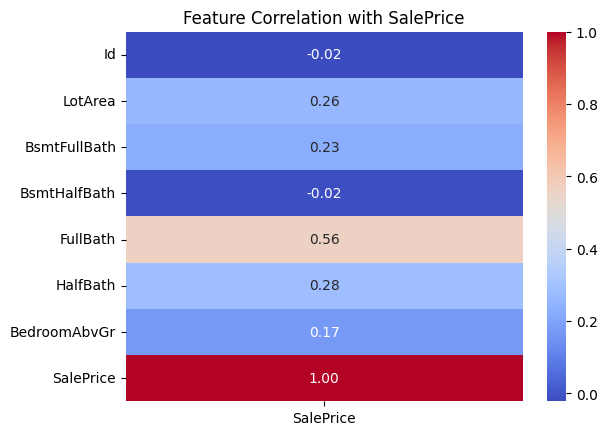

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = dataset_2.corr()

# Generate a heatmap
plt.figure()
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with SalePrice")
plt.show()

## Model Training

**Build final dataset eliminating 'Id' and 'BsmtHalfBath' due to too low correlation**

In [28]:
X = dataset_2[['LotArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']]
y = dataset_2[['SalePrice']]

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Display regression coefficients and R-squared value of model**

In [32]:
print(model.intercept_, model.coef_, model.score(X_train, y_train))

[38655.17100513] [[ 1.19187136e+00  3.47908279e+04  7.69336853e+04  3.50336570e+04
  -6.73416225e+03]] 0.4507077777046916


## Model Evaluation

In [34]:
y_pred = model.predict(X_test)

**Tabular comparison**

In [70]:
difference = y_test-y_pred
pred_df=pd.DataFrame({'Actual Value': y_test.squeeze(), 'Predicted Value': y_pred.squeeze(), 'Difference': difference.squeeze()})
pred_df.head()

,Actual Value,Predicted Value,Difference
892,154500,105414.775158,49085.224842
1105,325000,256752.115102,68247.884898
413,115000,112799.699165,2200.300835
522,159000,178279.411657,-19279.411657
1036,315500,229217.801732,86282.198268


**Graphical comparison**

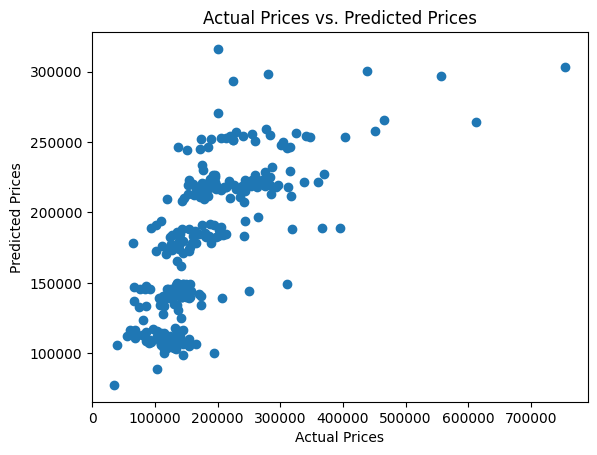

In [71]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

<Axes: xlabel='SalePrice'>

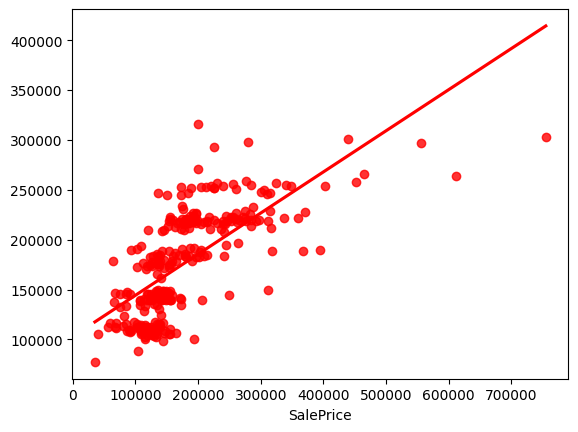

In [72]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [73]:
from sklearn.metrics import r2_score

Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 47.49


## Model Explanation

*The value of R-squared ranges from 0 to 100 percent. If a model fits the observed dependent variable values perfectly, the R-squared value is 1.0, although this is highly unlikely. An R-squared value like 0.49, for example, is far more likely, and means that the model explains 49% of the variation in the dependent variable.*